In [2]:
#Yahoo Finance API
import yfinance as yf

In [3]:
#Download the price history for the S&P 500 index fund
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-06 00:00:00-04:00,5206.419922,5312.339844,5193.560059,5240.029785,4690190000,0.0,0.0
2024-08-07 00:00:00-04:00,5293.129883,5330.640137,5195.540039,5199.500000,4558260000,0.0,0.0
2024-08-08 00:00:00-04:00,5252.569824,5328.029785,5233.850098,5319.310059,4016830000,0.0,0.0


<Axes: xlabel='Date'>

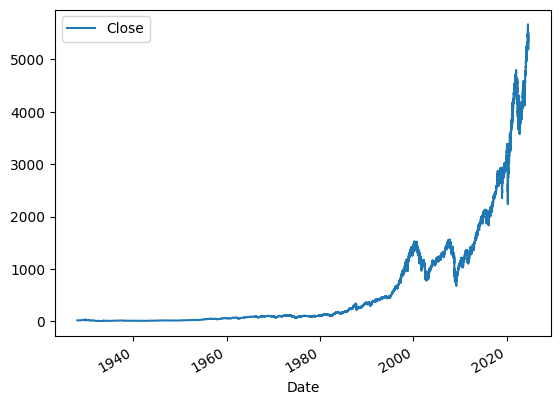

In [5]:
#Diplaying the closing price against the index
sp500.plot.line(y="Close", use_index=True)

In [6]:
#These columns are not needed for predicting an index
del sp500["Dividends"]
del sp500["Stock Splits"]